In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

In [114]:
data = pd.read_csv('data.csv')
df = data.drop(columns=['Unnamed: 32'])

In [115]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [116]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [117]:
def check_constraints(row):
    # Radius Mean constraint: If Malignant, radius_mean should be > 10
    if row['diagnosis'] == 'M' and row['radius_mean'] < 10:
        #print(f"Invalid radius mean: {row['radius_mean']}")
        return -1

    # Radius Mean constraint: If Benign, radius_mean should be > 6
    if row['diagnosis'] == 'B' and row['radius_mean'] < 6:
        return -1
        
    # Perimeter Mean constraint: If Malignant, perimeter_mean should be > 70
    if row['diagnosis'] == 'M' and row['perimeter_mean'] < 70:
        return -1

    # Perimeter Mean constraint: If Benign, perimeter_mean should be > 41
    if row['diagnosis'] == 'B' and row['perimeter_mean'] < 41:
        return -1
        
    # Area Mean constraint: If Malignant, area_mean should be >= 350
    if row['diagnosis'] == 'M' and row['area_mean'] < 350:
        return -1

    # Area Mean constraint: If Benign, area_mean should be >= 142
    if row['diagnosis'] == 'B' and row['area_mean'] < 142:
        return -1

    # Concavity Mean constraint: concavity_mean < 0.5
    if row['concavity_mean'] > 0.5:
        return -1

    # Concave Points Mean constraint: concave_points_mean > 0
    if row['concave points_mean'] < 0:
        return -1

    # Worst Perimeter constraint: If Malignant, perimeter_worst > 84
    if row['diagnosis'] == 'M' and row['perimeter_worst'] < 84:
        return -1

    # Worst Perimeter constraint: If Benign, perimeter_worst > 49
    if row['diagnosis'] == 'B' and row['perimeter_worst'] < 49:
        return -1
    
    # Worst Area constraint: If Malignant, area_worst > 500
    if row['diagnosis'] == 'M' and row['area_worst'] < 500:
        return -1

    # Worst Area constraint: If Benign, area_worst > 184
    if row['diagnosis'] == 'B' and row['area_worst'] < 184:
        return -1

    # If all constraints are satisfied, return 1
    return 1


In [118]:
# Apply the constraint check to each row
df['valid'] = df.apply(check_constraints, axis=1)

# Show rows that fail the constraints
invalid_rows = df[df['valid'] == -1]
invalid_rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,valid


In [119]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Ground truth: Assume all data points are valid (True)
# y_true = [True] * len(df)

# # Predictions: Based on our constraint checks
# y_pred = df['valid']

# # Calculate metrics
# accuracy = accuracy_score(y_true, y_pred)
# precision = precision_score(y_true, y_pred)
# recall = recall_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)

# # Print the results
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")

In [120]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a copy of the dataset and randomly mutate 1% of the rows
df_mutated = df.copy()
num_mutations = int(0.01 * len(df))  # Mutate 1% of rows
mutation_indices = np.random.choice(df.index, size=num_mutations, replace=False)

# Mutate by adding large random
df_mutated.loc[mutation_indices, 'diagnosis'] = 'M'
df_mutated.loc[mutation_indices, 'radius_mean'] = np.random.uniform(5, 4, size=num_mutations)


# Ground truth: Now, we assume the mutated rows are invalid (-1), others are valid (1)
y_true = np.ones(len(df), dtype=int)  # Default all rows as valid (1)
y_true[mutation_indices] = -1         # Mark mutated rows as invalid (-1)

# Predictions: Based on our constraint checks
y_pred = df_mutated.apply(check_constraints, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [121]:
# Print the first 20 ground truth labels
print(y_true[:20])

# Print the first 20 predicted labels
print(y_pred[:20])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
dtype: int64


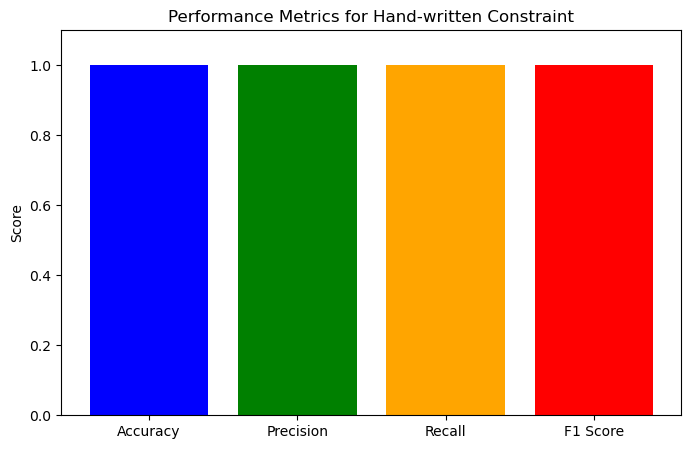

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plot the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1.1
plt.title('Performance Metrics for Hand-written Constraint')
plt.ylabel('Score')
plt.show()

Unique values in y_true: [-1  1]
Unique values in y_pred: [-1  1]


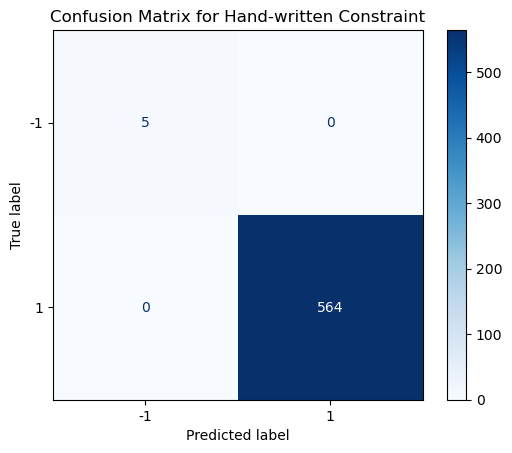

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Check the unique values in y_true and y_pred
print(f"Unique values in y_true: {np.unique(y_true)}")
print(f"Unique values in y_pred: {np.unique(y_pred)}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Handle case where only one class is present
if len(np.unique(y_true)) == 1 or len(np.unique(y_pred)) == 1:
    # Only one class in ground truth or predictions
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
else:
    # Both classes are present
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Hand-written Constraint')
plt.show()